In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.preprocessing import PowerTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
df=pd.read_csv("concrete_data.csv")
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
x=df.drop("csMPa",axis=1)
y=df[["csMPa"]]

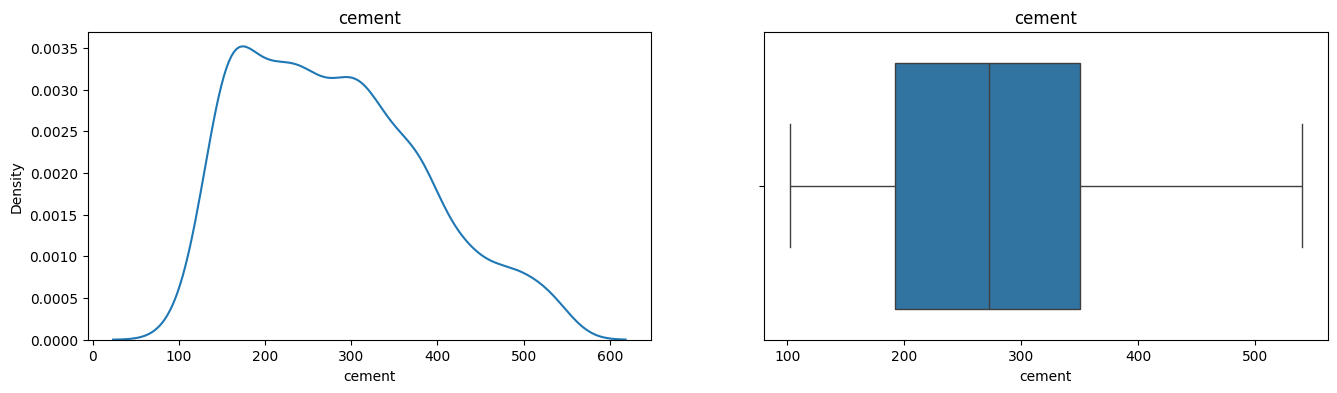

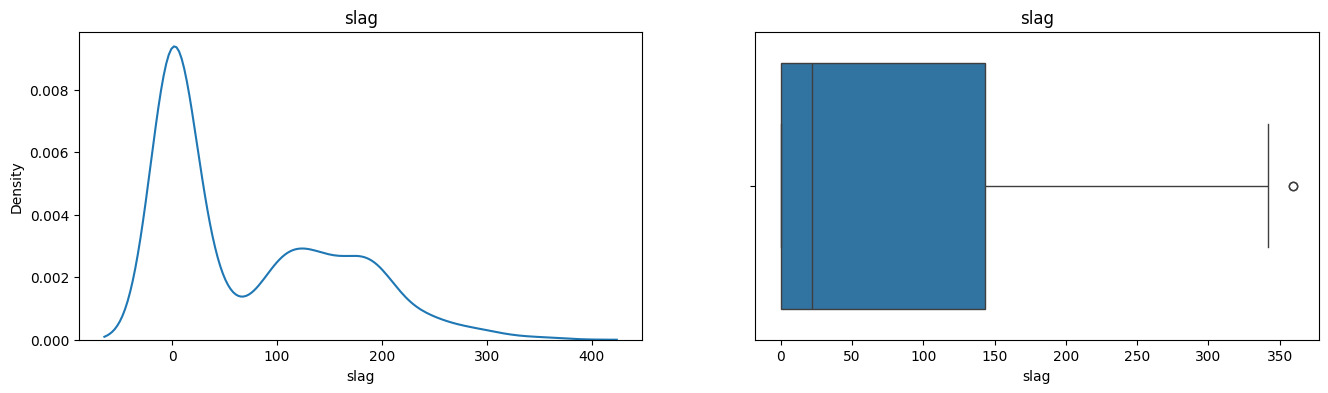

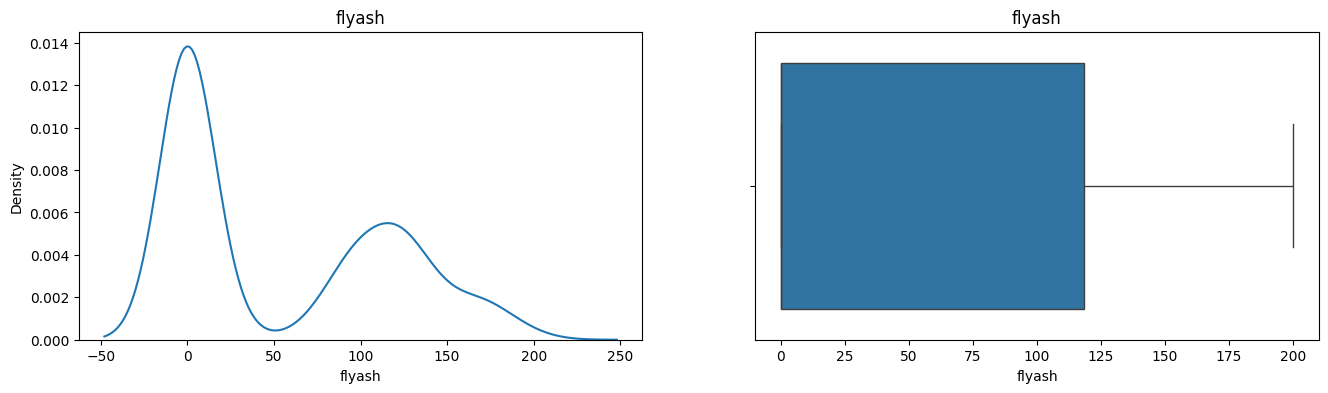

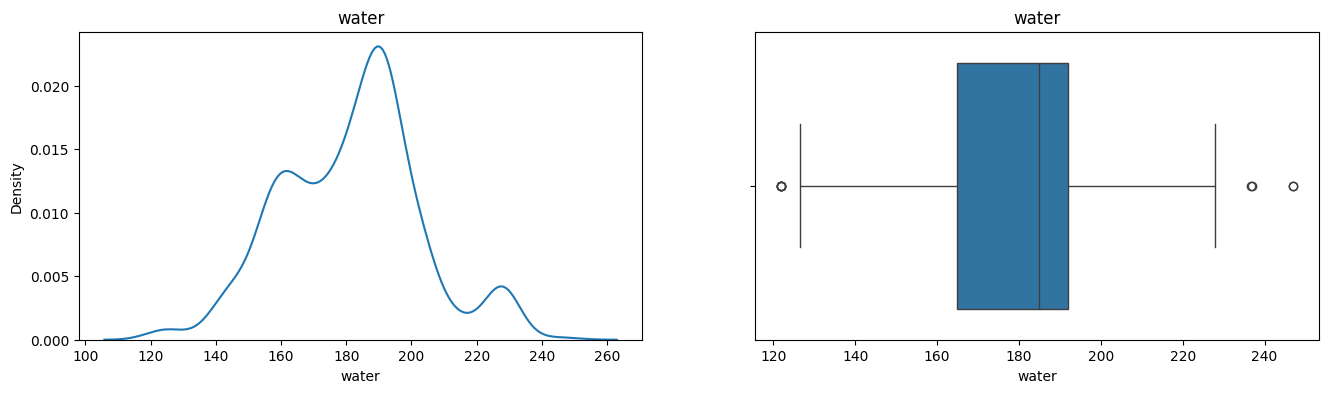

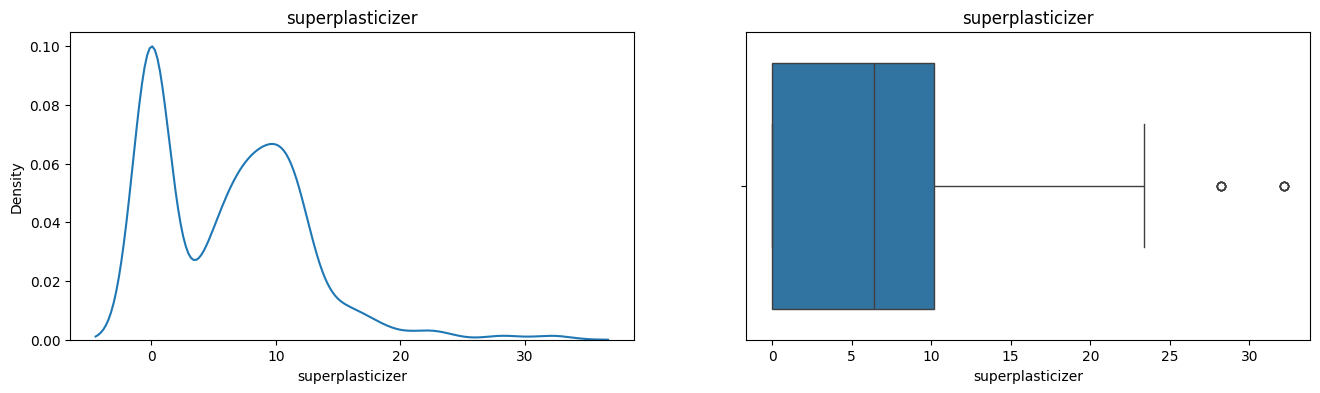

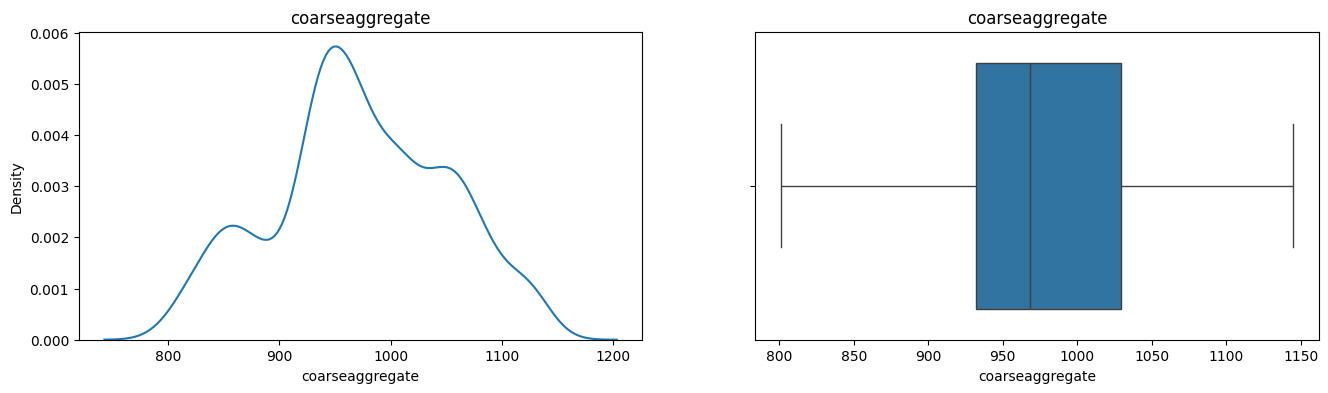

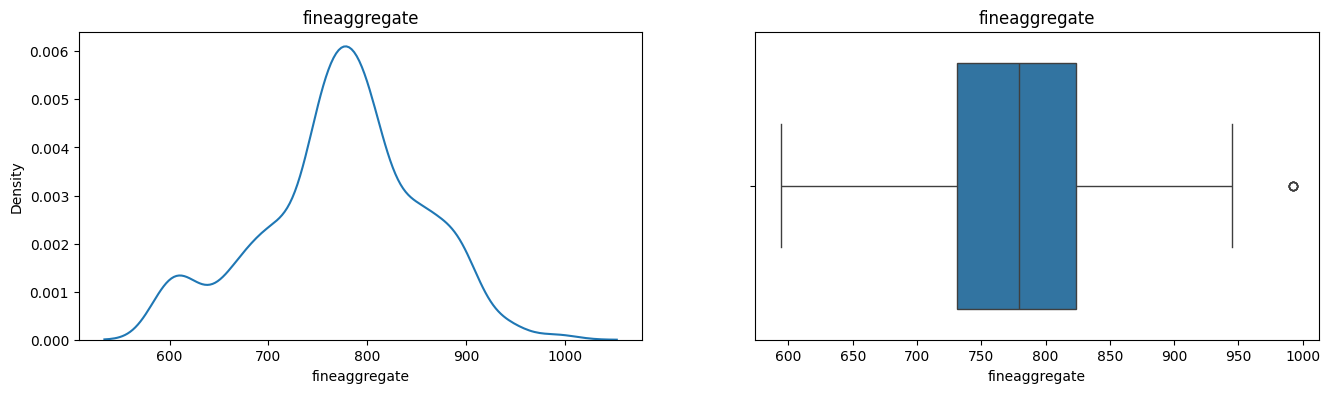

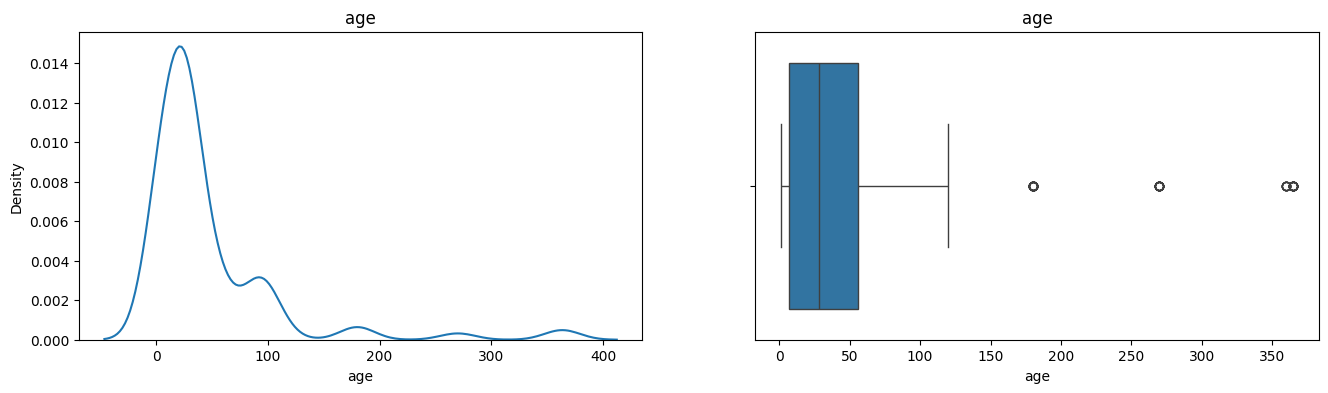

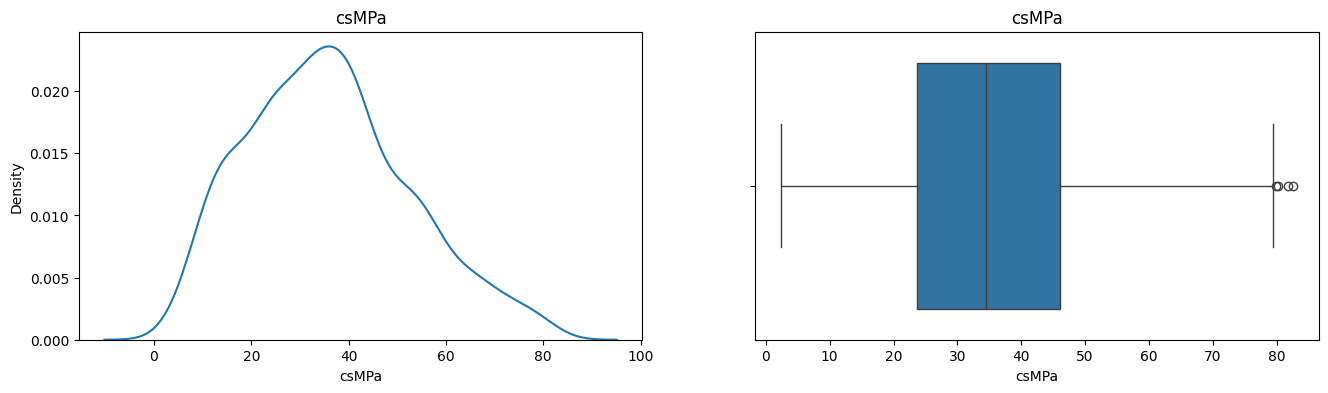

In [6]:
for col in df.columns:
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(x=df[col])
    plt.title(col)

    plt.show()

### LinearRegression

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((824, 8), (206, 8), (824, 1), (206, 1))

In [9]:
x_train

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
128,401.8,94.7,0.0,147.4,11.4,946.8,852.1,28
365,214.9,53.8,121.9,155.6,9.6,1014.3,780.6,14
480,446.0,24.0,79.0,162.0,11.6,967.0,712.0,7
814,310.0,0.0,0.0,192.0,0.0,970.0,850.0,360
169,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91
...,...,...,...,...,...,...,...,...
360,218.2,54.6,123.8,140.8,11.9,1075.7,792.7,14
466,190.3,0.0,125.2,166.6,9.9,1079.0,798.9,100
299,290.4,0.0,96.2,168.1,9.4,961.2,865.0,3
493,387.0,20.0,94.0,157.0,11.6,938.0,845.0,7


In [10]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
### Training ####

y_pred_train=lr.predict(x_train)

mean_s_error=mean_squared_error(y_train,y_pred_train)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  107.88650360511504
**************************************************
MAE =  8.250273346319867
**************************************************
R_squared =  0.6239597599587898
**************************************************


In [12]:
### Testing ####

y_pred_test=lr.predict(x_test)

mean_s_error=mean_squared_error(y_test,y_pred_test)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  105.76432225737778
**************************************************
MAE =  8.226419967037103
**************************************************
R_squared =  0.570114265275778
**************************************************


In [13]:
R_squared_train =  0.62
R_squared_test =  0.570

#### Scaling

In [14]:
std_scale=StandardScaler()
std_scale.fit(x_train)
x_train_transform=std_scale.transform(x_train)
x_test_transform=std_scale.transform(x_test)

In [15]:
x_train_transform=pd.DataFrame(x_train_transform,columns=x_train.columns)
x_test_transform=pd.DataFrame(x_test_transform,columns=x_test.columns)

In [16]:
lr_transform=LinearRegression()
lr_transform.fit(x_train_transform,y_train)

LinearRegression()

In [17]:
### Training on scaling data ####

y_pred_train_transform=lr_transform.predict(x_train_transform)

mean_s_error=mean_squared_error(y_train,y_pred_train_transform)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train_transform)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train_transform)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  107.88650360511504
**************************************************
MAE =  8.250273346319867
**************************************************
R_squared =  0.6239597599587898
**************************************************


In [18]:
### Testing on scaling data ####

y_pred_test_transform=lr_transform.predict(x_test_transform)

mean_s_error=mean_squared_error(y_test,y_pred_test_transform)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test_transform)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test_transform)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  105.76432225737781
**************************************************
MAE =  8.226419967037106
**************************************************
R_squared =  0.5701142652757779
**************************************************


In [19]:
R_squared_train_scaling =  0.62
R_squared_test_scaling =  0.57

#### Remove_outliers

In [20]:
df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


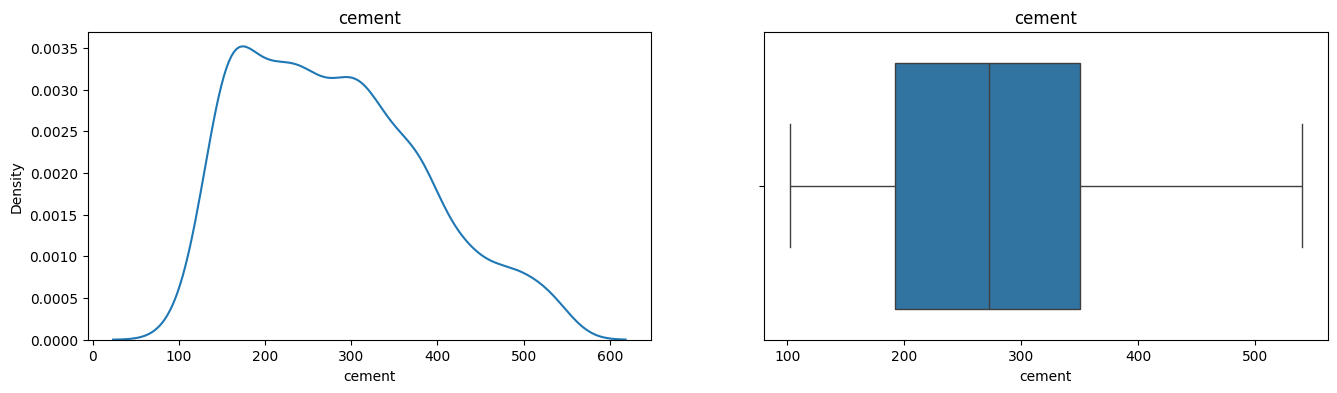

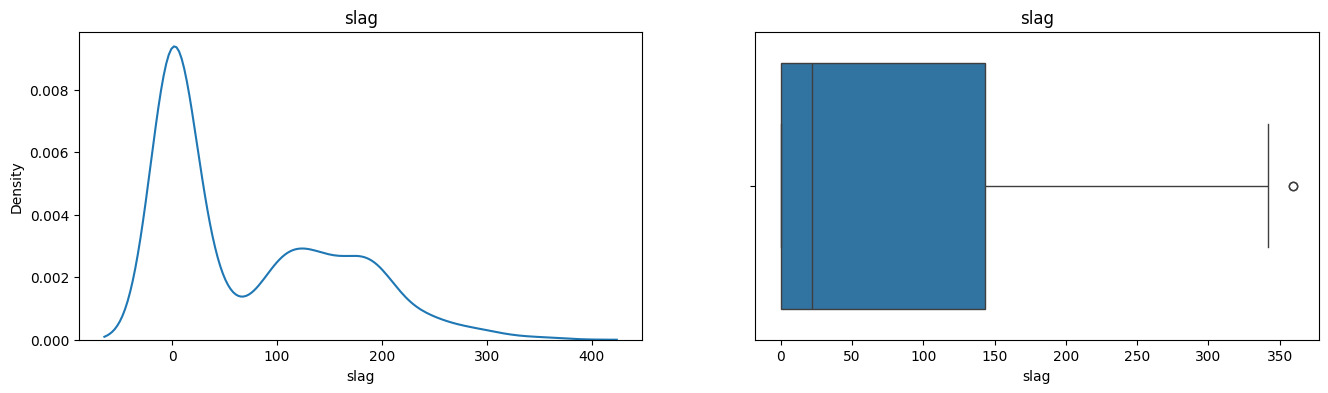

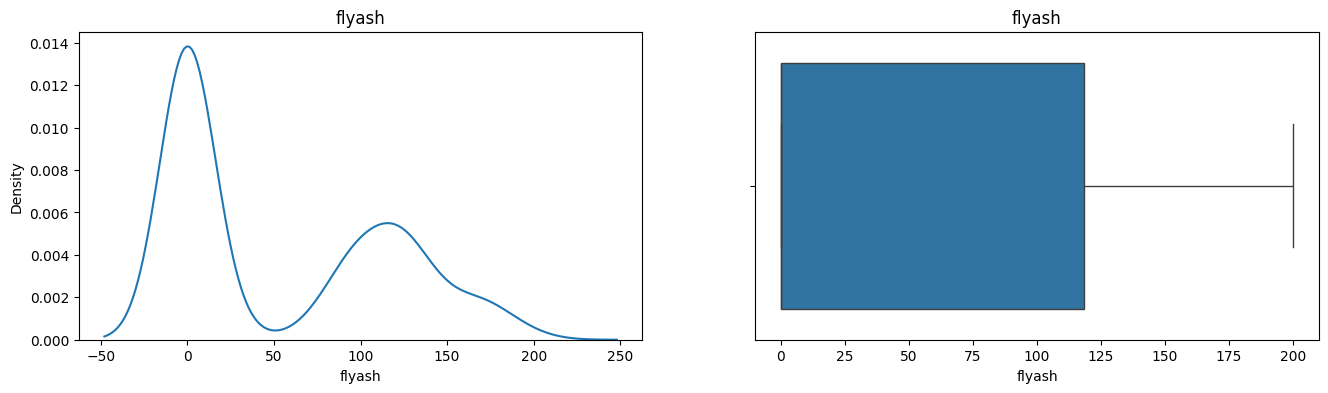

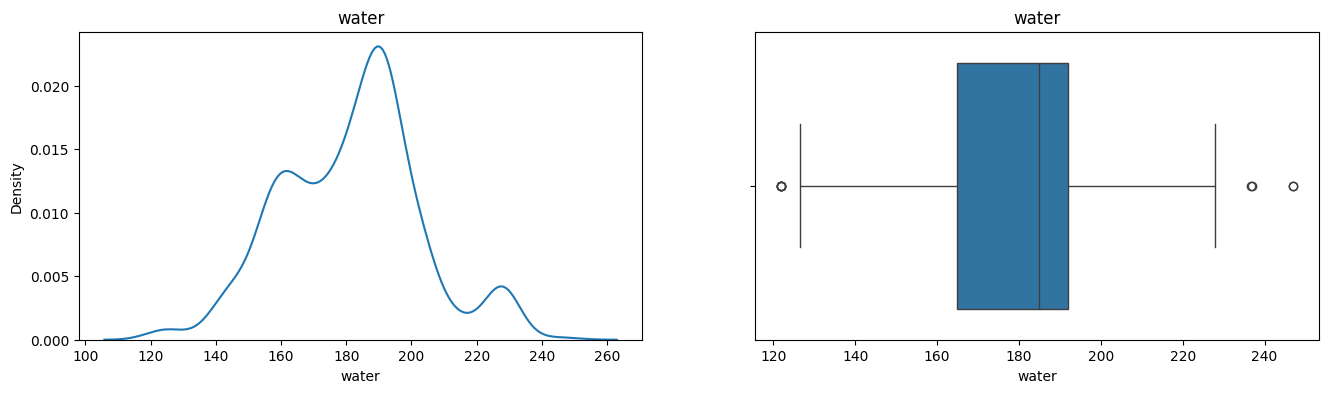

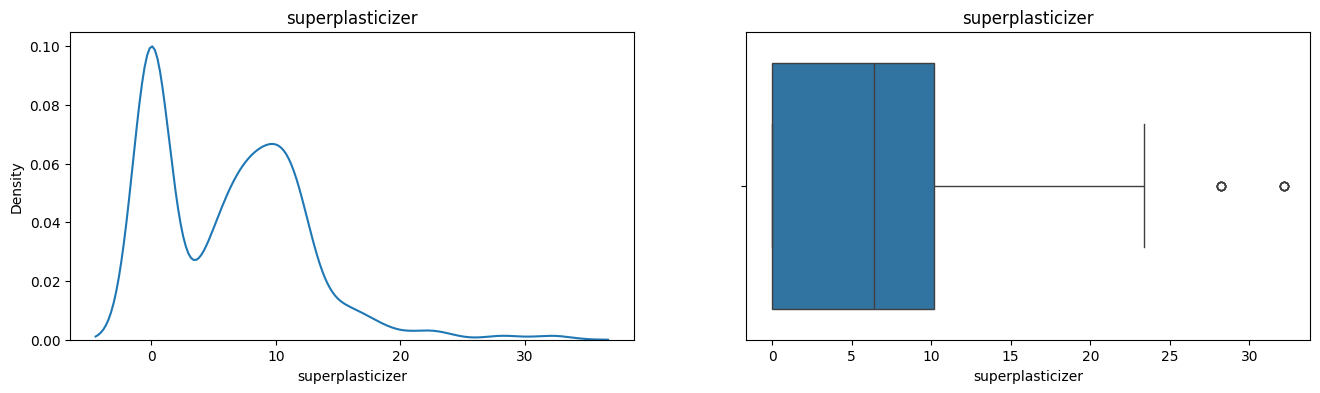

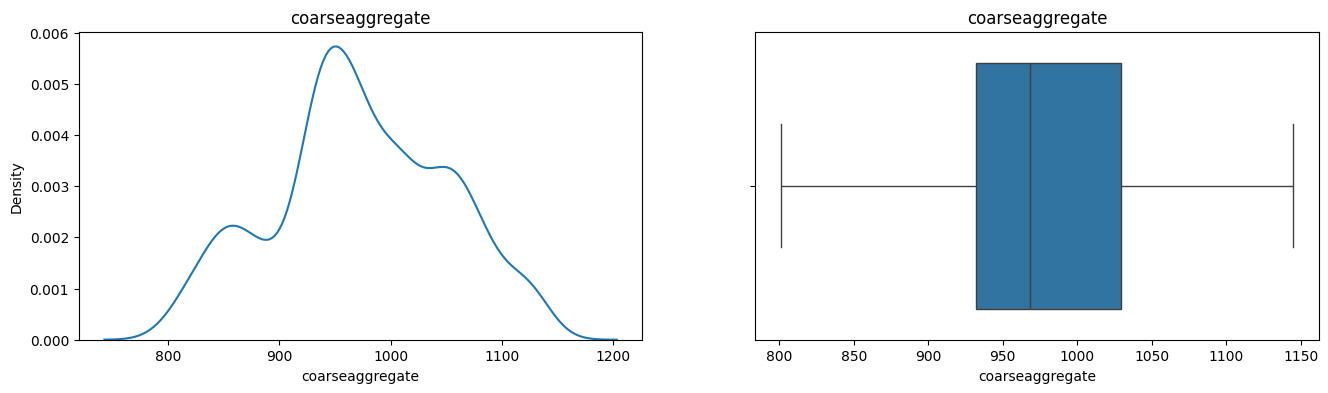

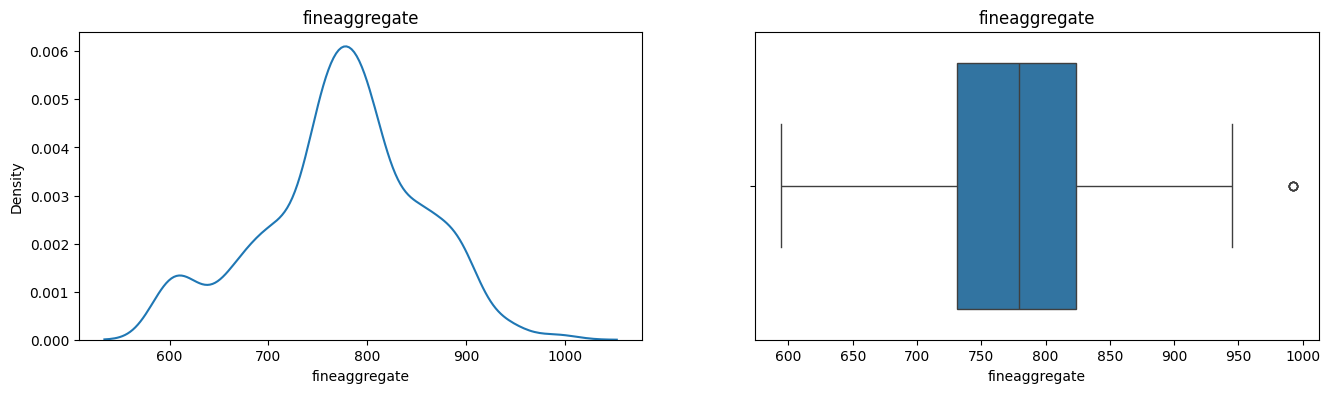

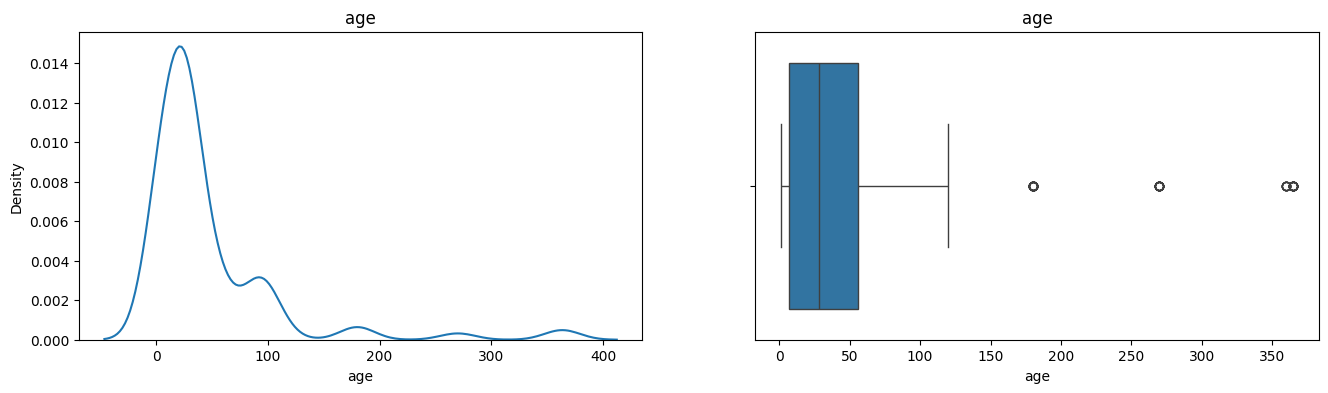

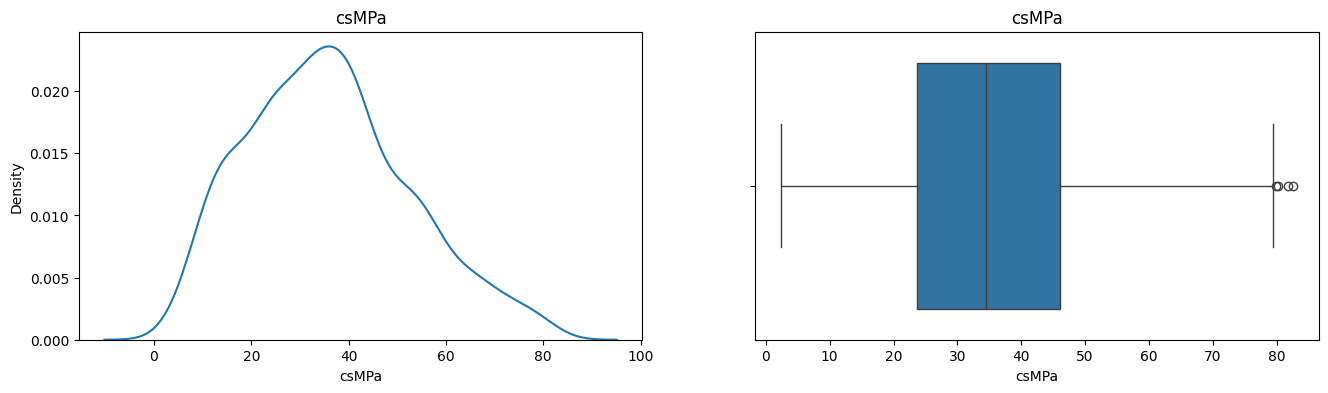

In [21]:
for col in df.columns:
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    sns.kdeplot(df[col])
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(x=df[col])
    plt.title(col)

    plt.show()

In [22]:
pt=PowerTransformer()
x_train_transform=pt.fit_transform(x_train)
x_test_transform=pt.transform(x_test)

In [23]:
x_train_transform=pd.DataFrame(x_train_transform,columns=x_train.columns)
x_test_transform=pd.DataFrame(x_test_transform,columns=x_test.columns)

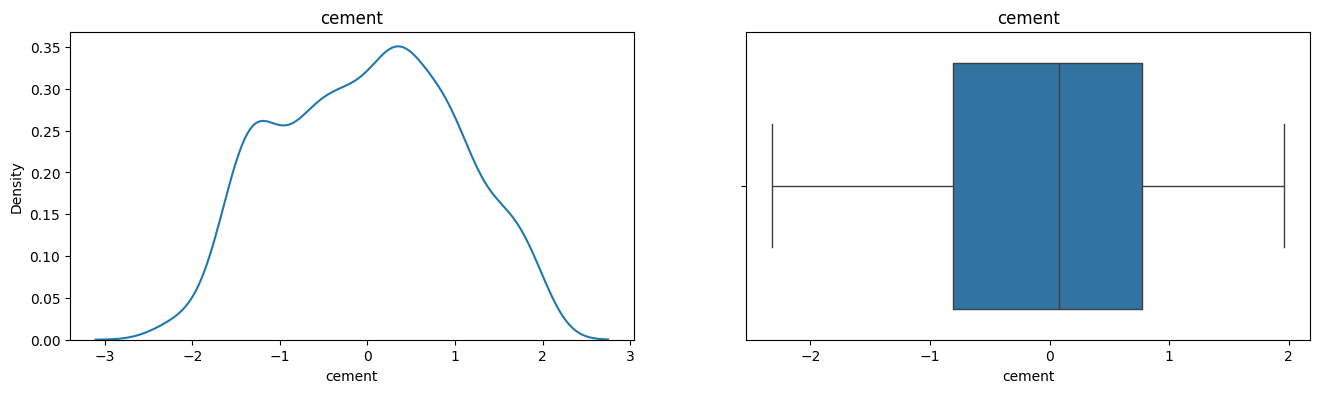

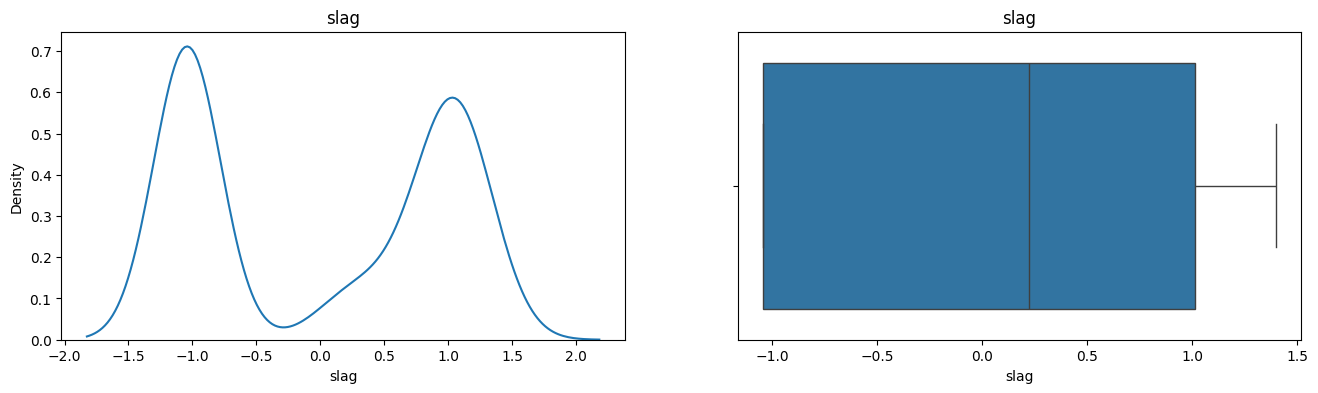

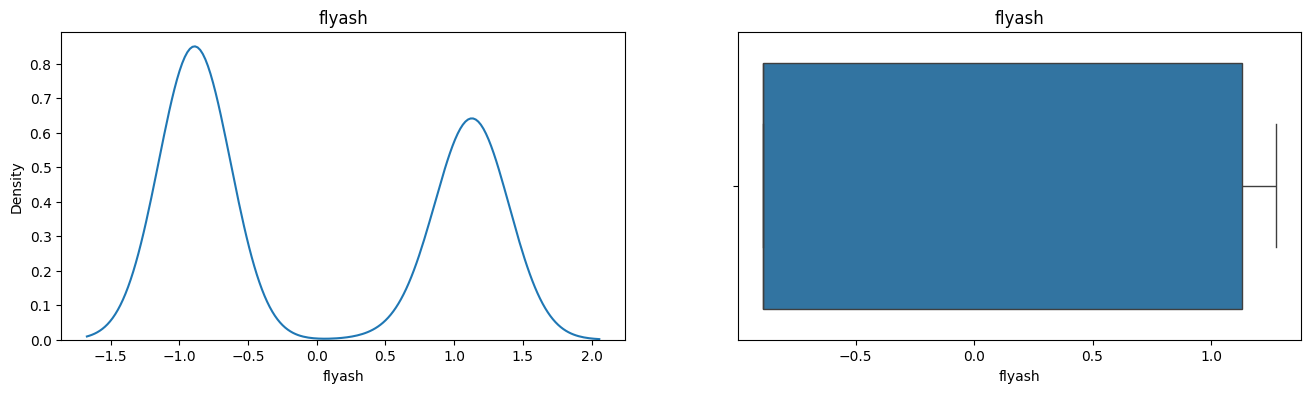

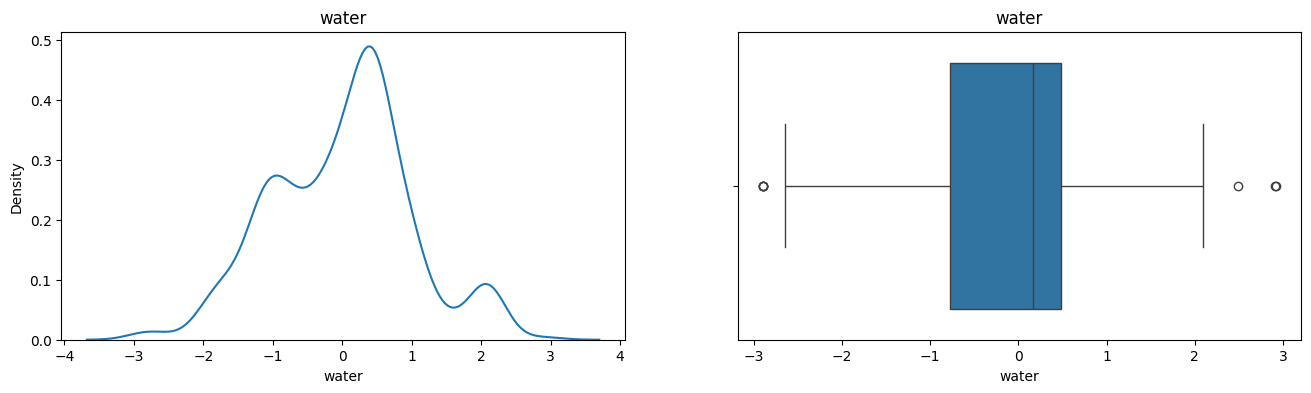

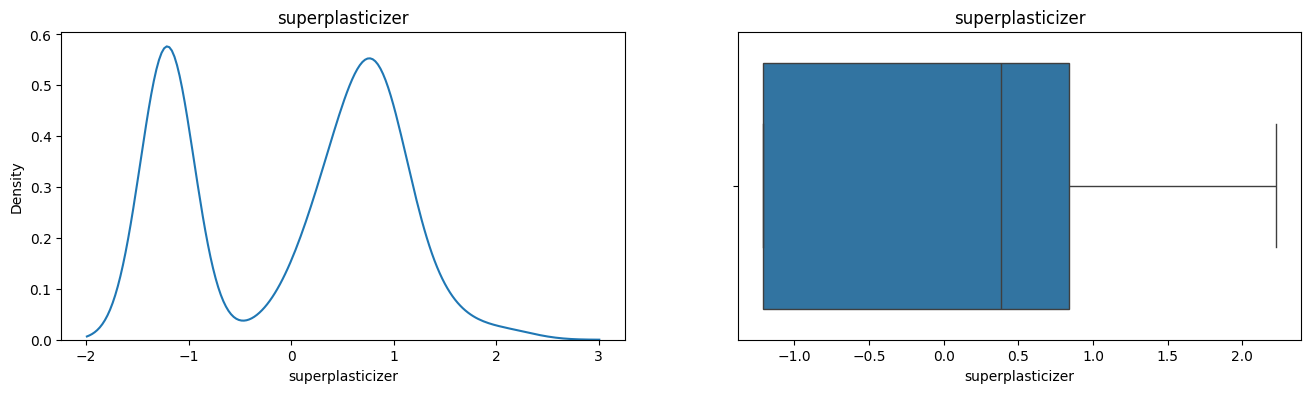

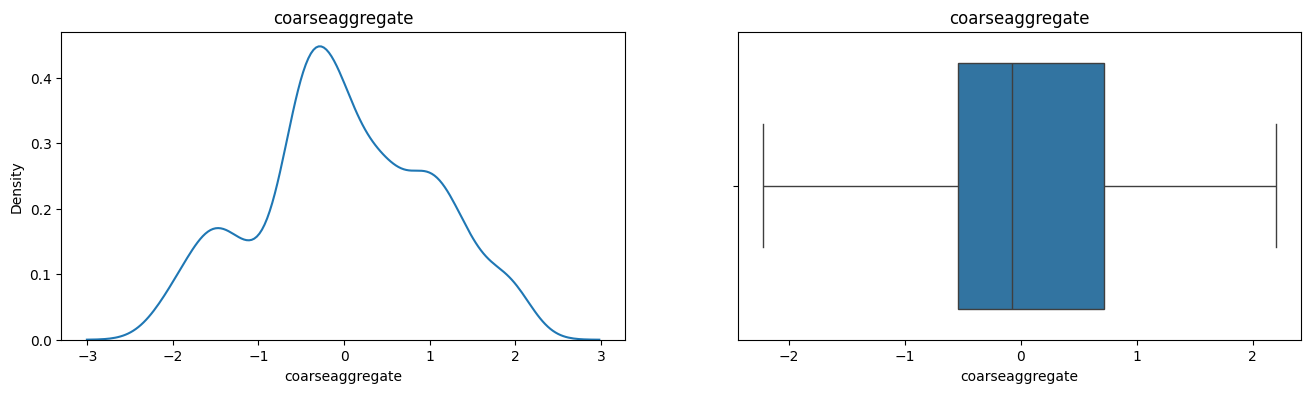

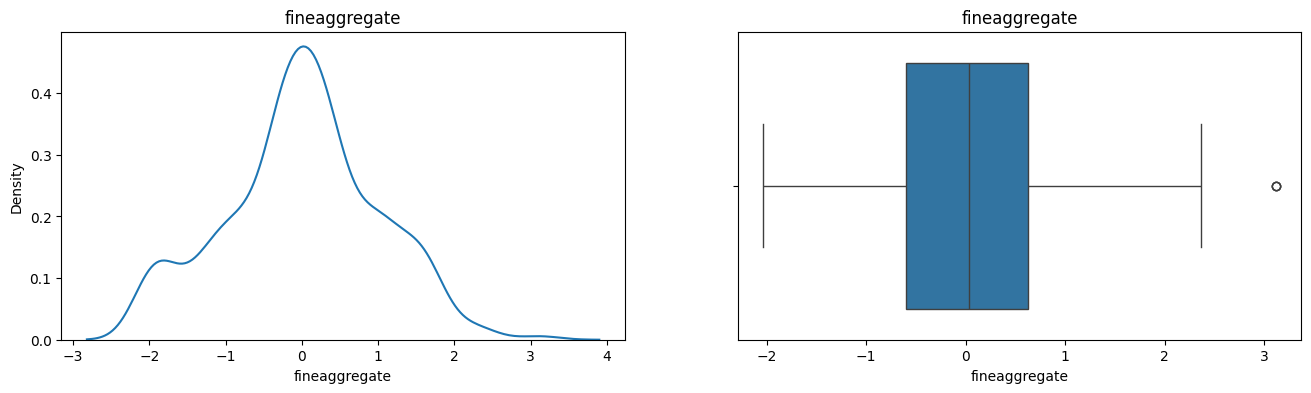

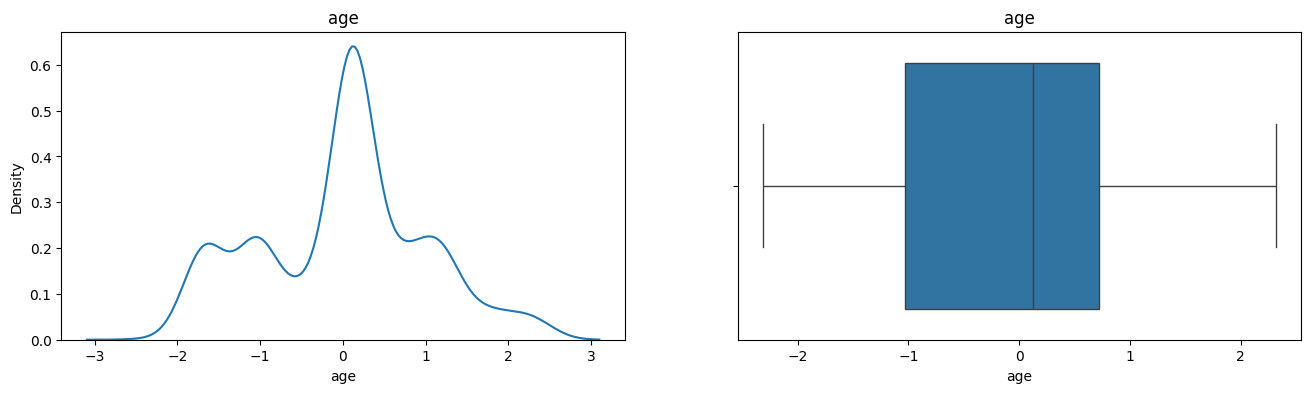

In [24]:
for col in x_train_transform.columns:
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    sns.kdeplot(x_train_transform[col])
    plt.title(col)

    plt.subplot(122)
    sns.boxplot(x=x_train_transform[col])
    plt.title(col)

    plt.show()

In [25]:
lr_transform=LinearRegression()
lr_transform.fit(x_train_transform,y_train)

LinearRegression()

In [26]:
### Training on scaling data ####

y_pred_train_transform=lr_transform.predict(x_train_transform)

mean_s_error=mean_squared_error(y_train,y_pred_train_transform)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train_transform)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train_transform)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  53.64847263477367
**************************************************
MAE =  5.707812853223358
**************************************************
R_squared =  0.8130073377735442
**************************************************


In [27]:
### Testing on scaling data ####

y_pred_test_transform=lr_transform.predict(x_test_transform)

mean_s_error=mean_squared_error(y_test,y_pred_test_transform)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test_transform)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test_transform)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  54.74350577200687
**************************************************
MAE =  5.742355385842684
**************************************************
R_squared =  0.7774915803562743
**************************************************


In [28]:
R_squared_train_transform =  0.81
R_squared_test_transform =  0.78

### KNN Regression

In [29]:
std_scale=StandardScaler()
std_scale.fit(x_train)
x_train_scaled=std_scale.transform(x_train)
x_test_scaled=std_scale.transform(x_test)

In [30]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [31]:
knn_reg=KNeighborsRegressor()
knn_reg.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [32]:
### Training on scaling data ####

y_pred_train=knn_reg.predict(x_train_scaled)

mean_s_error=mean_squared_error(y_train,y_pred_train)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  51.86376136407766
**************************************************
MAE =  5.4709490291262135
**************************************************
R_squared =  0.8192279792088549
**************************************************


In [33]:
### Testing on scaling data ####

y_pred_test=knn_reg.predict(x_test_scaled)

mean_s_error=mean_squared_error(y_test,y_pred_test)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  79.74432178640777
**************************************************
MAE =  6.818621359223301
**************************************************
R_squared =  0.6758741924539364
**************************************************


In [34]:
R_squared_train =  0.82
R_squared_test =  0.68

#### Find Best K values

k=  14
train_r2_score list  
 [0.994, 0.919, 0.866, 0.845, 0.819, 0.806, 0.79, 0.772, 0.758, 0.745, 0.738, 0.732, 0.726, 0.718]
test_r2_score list  
 [0.717, 0.687, 0.702, 0.689, 0.676, 0.671, 0.661, 0.661, 0.663, 0.658, 0.652, 0.64, 0.635, 0.633]


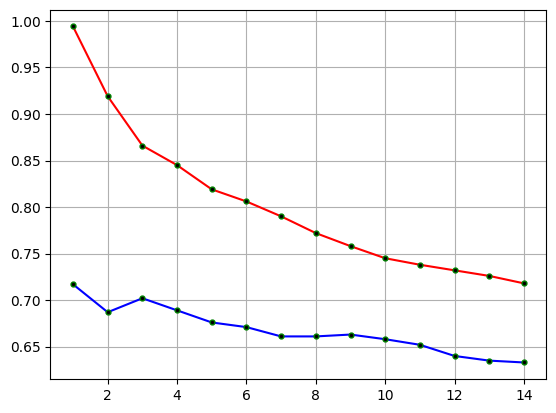

In [35]:
#### when p=2

k_values = np.arange(1,15)
train_r2_score = []
test_r2_score = []
for k in k_values:
    knn_reg =  KNeighborsRegressor(n_neighbors=k, p=2)
    knn_reg.fit(x_train_scaled, y_train)
    train_r2_score.append(np.around(knn_reg.score(x_train_scaled, y_train),3))
    test_r2_score.append(np.around(knn_reg.score(x_test_scaled, y_test),3))

print("k= ",k)
print("train_r2_score list  \n",train_r2_score)
print("test_r2_score list  \n",test_r2_score)

plt.plot(k_values,train_r2_score,c="red",marker=".",ms=7,mfc="black",mec="green")
plt.plot(k_values,test_r2_score,c="blue",marker=".",ms=7,mfc="black",mec="green")
plt.grid(True)
plt.show()

k=  14
train_r2_score list  
 [0.994, 0.911, 0.848, 0.813, 0.795, 0.792, 0.781, 0.773, 0.76, 0.752, 0.744, 0.735, 0.722, 0.714]
test_r2_score list  
 [0.696, 0.656, 0.645, 0.655, 0.665, 0.656, 0.654, 0.657, 0.666, 0.661, 0.656, 0.653, 0.646, 0.642]


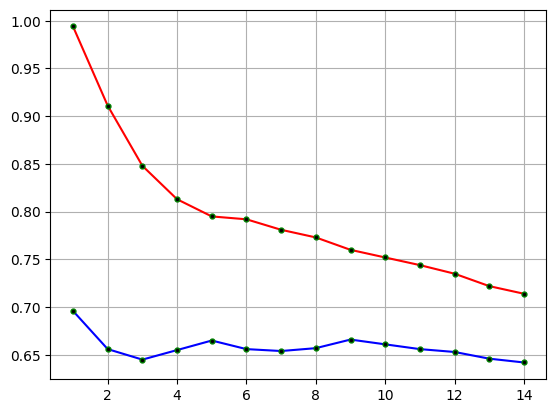

In [36]:
#### when p=1

k_values = np.arange(1,15)
train_r2_score = []
test_r2_score = []
for k in k_values:
    knn_reg =  KNeighborsRegressor(n_neighbors=k, p=1)
    knn_reg.fit(x_train_scaled, y_train)
    train_r2_score.append(np.around(knn_reg.score(x_train_scaled, y_train),3))
    test_r2_score.append(np.around(knn_reg.score(x_test_scaled, y_test),3))

print("k= ",k)
print("train_r2_score list  \n",train_r2_score)
print("test_r2_score list  \n",test_r2_score)

plt.plot(k_values,train_r2_score,c="red",marker=".",ms=7,mfc="black",mec="green")
plt.plot(k_values,test_r2_score,c="blue",marker=".",ms=7,mfc="black",mec="green")
plt.grid(True)
plt.show()

### Decision Tree

In [37]:
dt=DecisionTreeRegressor(random_state=1)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [38]:
### Training ###

y_pred_train=dt.predict(x_train)

mean_s_error=mean_squared_error(y_train,y_pred_train)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  1.152175020226537
**************************************************
MAE =  0.10832119741100323
**************************************************
R_squared =  0.9959840744050683
**************************************************


In [39]:
### Testing ###

y_pred_test =dt.predict(x_test)

mean_s_error=mean_squared_error(y_test,y_pred_test)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  54.409367597087375
**************************************************
MAE =  4.606140776699029
**************************************************
R_squared =  0.7788497059676229
**************************************************


In [69]:
R_squared_train =  0.99
R_squared_test =  0.78

#### Hyperparameter Tuning

In [41]:
dt = DecisionTreeRegressor(random_state=1)

hyp_grid={'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : np.arange(5,10),
    'min_samples_split' : np.arange(5,15),
    'min_samples_leaf' : np.arange(3,6) }

dt_gs_cv=GridSearchCV(dt,param_grid=hyp_grid,cv=3,n_jobs=-1)
dt_gs_cv.fit(x_train,y_train)


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [42]:
dt_gs_cv.best_estimator_

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=7,
                      random_state=1)

In [43]:
dtc = dt_gs_cv.best_estimator_
dtc.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=7,
                      random_state=1)

In [44]:
### Training ###

y_pred_train=dtc.predict(x_train)

mean_s_error=mean_squared_error(y_train,y_pred_train)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  12.759890852762366
**************************************************
MAE =  2.5702047361925313
**************************************************
R_squared =  0.9555251837918963
**************************************************


In [45]:
### Testing ###

y_pred_test =dtc.predict(x_test)

mean_s_error=mean_squared_error(y_test,y_pred_test)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  55.42773845660595
**************************************************
MAE =  5.403985292550474
**************************************************
R_squared =  0.774710473608146
**************************************************


In [46]:
R_squared_train =  0.95
R_squared_test =  0.77

### RandomForest Regression

In [47]:
rf_reg=RandomForestRegressor(random_state=1)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [48]:
### Training ###

y_pred_train=rf_reg.predict(x_train)

mean_s_error=mean_squared_error(y_train,y_pred_train)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  4.343375396332842
**************************************************
MAE =  1.3288588570561717
**************************************************
R_squared =  0.9848610913131061
**************************************************


In [49]:
### Testing ###

y_pred_test =rf_reg.predict(x_test)

mean_s_error=mean_squared_error(y_test,y_pred_test)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  25.138019061960495
**************************************************
MAE =  3.493540923485896
**************************************************
R_squared =  0.8978249416881356
**************************************************


In [70]:
R_squared_train =  0.98
R_squared_test = 0.90

#### HyperParameter Tuning

In [51]:
rf = RandomForestRegressor(random_state=1)

hyp_grid={'criterion' : ['squared_error', 'absolute_error'],
    'max_depth' : np.arange(5,10),
    'min_samples_split' : np.arange(5,15),
    'min_samples_leaf' : np.arange(3,6) }

rf_gs_cv=GridSearchCV(rf,param_grid=hyp_grid,cv=3,n_jobs=-1)
rf_gs_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [52]:
rf_gs_cv.best_estimator_

RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=5,
                      random_state=1)

In [53]:
rfc=rf_gs_cv.best_estimator_
rfc.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=3, min_samples_split=5,
                      random_state=1)

In [54]:
### Training ###

y_pred_train=rfc.predict(x_train)

mean_s_error=mean_squared_error(y_train,y_pred_train)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  11.745900122511026
**************************************************
MAE =  2.444916645295174
**************************************************
R_squared =  0.95905946569799
**************************************************


In [55]:
### Testing ###

y_pred_test =rfc.predict(x_test)

mean_s_error=mean_squared_error(y_test,y_pred_test)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  30.787872611686776
**************************************************
MAE =  4.0422127737154865
**************************************************
R_squared =  0.8748607568621991
**************************************************


In [56]:
R_squared_train = 0.95
R_squared_test = 0.87

### AdaboostRegression

In [57]:
ad_reg=AdaBoostRegressor(random_state=1)
ad_reg.fit(x_train,y_train)

AdaBoostRegressor(random_state=1)

In [58]:
### Training ###

y_pred_train=ad_reg.predict(x_train)

mean_s_error=mean_squared_error(y_train,y_pred_train)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  50.461001271163646
**************************************************
MAE =  5.994706281659
**************************************************
R_squared =  0.8241173233291385
**************************************************


In [59]:
### Testing ###

y_pred_test =ad_reg.predict(x_test)

mean_s_error=mean_squared_error(y_test,y_pred_test)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  67.37146158587669
**************************************************
MAE =  6.650999879156287
**************************************************
R_squared =  0.7261644603289745
**************************************************


In [60]:
R_squared_train = 0.824
R_squared_test = 0.726

#### HyperParameter Tuning

In [61]:
ad_reg =AdaBoostRegressor(random_state=1)

hyp_grid={'n_estimators' : np.arange(10,100,4),
    'learning_rate' : np.arange(0,1,0.1) }

ad_reg_gs_cv=GridSearchCV(ad_reg,param_grid=hyp_grid,cv=3,n_jobs=-1)
ad_reg_gs_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74,
       78, 82, 86, 90, 94, 98])})

In [62]:
ad_reg_gs_cv.best_estimator_

AdaBoostRegressor(learning_rate=0.6000000000000001, n_estimators=98,
                  random_state=1)

In [63]:
ad_regc=ad_reg_gs_cv.best_estimator_
ad_regc.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.6000000000000001, n_estimators=98,
                  random_state=1)

In [64]:
### Training ###

y_pred_train=ad_regc.predict(x_train)

mean_s_error=mean_squared_error(y_train,y_pred_train)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_train,y_pred_train)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_train,y_pred_train)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  50.566899285046595
**************************************************
MAE =  5.997820266924406
**************************************************
R_squared =  0.823748214003785
**************************************************


In [65]:
### Testing ###

y_pred_test =ad_regc.predict(x_test)

mean_s_error=mean_squared_error(y_test,y_pred_test)
print("MSE = ",mean_s_error)
print("*"*50)
mean_a_error=mean_absolute_error(y_test,y_pred_test)
print("MAE = ",mean_a_error)
print("*"*50)
r2_s=r2_score(y_test,y_pred_test)
print("R_squared = ",r2_s)
print("*"*50)

MSE =  65.83833648744047
**************************************************
MAE =  6.629187655051727
**************************************************
R_squared =  0.7323959436429937
**************************************************


In [66]:
R_squared_train = 0.82
R_squared_test = 0.732

### Conclusion

### Best Model

In [72]:
import pickle

#### Best Model Test File

In [73]:
with open("Concrete....RandomForest_reg_model.pkl", 'wb') as f:
    pickle.dump(rfc, f)